# 대체 과제 1번

## 주제

전국 생활쓰레기봉투 & 음식물쓰레기봉투 가격 비교

## 데이터 설명

[공공데이터포탈](https://www.data.go.kr/data/15025538/standard.do)에서 가져온 전국종량제봉투가격표준데이터를 사용합니다.

## 데이터 선택 이유

공공데이터 포탈에서 조회수가 높아서 선택했습니다. 데이터를 살펴 보니 "지역마다 차이가 없지는 않은 것 같은데, 분포가 어떻게 될까?" 라는 물음이 떠올랐습니다.

## 데이터 전처리 내용

### 필요한 데이터만 선정

`규격봉투 & 소각용 & 생활쓰레기 & 가정용 & 10ℓ`와, `규격봉투 & 소각용 & 음식물쓰레기 & 가정용 & 5ℓ`만 걸러 냅니다.

### 시도별로 그룹

시군구별로 나뉘어진 데이터를 시별로 뭉칩니다. 뭉치는 과정에서 가격은 평균을 냅니다.

### 원하는 리터 수의 가격만 추출

생활쓰레기는 10ℓ, 음식물쓰레기는 5ℓ 가격으로 비교합니다.

## 그래프 결과 해석

서울특별시는 음식물쓰레기봉투가 일반쓰레기봉투보다 비싼 유일한 도시입니다.

<AxesSubplot:xlabel='시도명'>

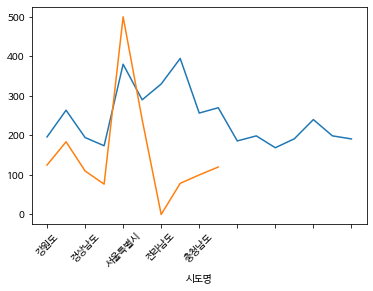

In [12]:
import pandas as pd

df = pd.read_csv('data.csv')

ax = df[
    df.종량제봉투종류.eq('규격봉투') &
    df.종량제봉투처리방식.eq('소각용') &
    df.종량제봉투용도.eq('생활쓰레기') &
    df.종량제봉투사용대상.eq('가정용')
    ].groupby('시도명').mean()['10ℓ가격'].plot(rot=45)

df[
    df.종량제봉투종류.eq('규격봉투') &
    df.종량제봉투처리방식.eq('소각용') &
    df.종량제봉투용도.eq('음식물쓰레기') &
    df.종량제봉투사용대상.eq('가정용')
    ].groupby('시도명').mean()['5ℓ가격'].plot(rot=45, ax=ax)

# 대체 과제 2번

## 주제

인기있는 프로그래밍 언어 순위

## 데이터 설명

[TIOBE 인덱스](https://www.tiobe.com/tiobe-index/)를 사용하였습니다.

## 데이터 선택 이유

Major한 프로그래밍 언어는 몇 개나 될 지 궁금하였습니다.

언어별 점유율을 내림차순으로 정렬하여 막대 그래프를 그려 보면 점유율이 확 떨어지는 지점이 있을 것이라고 생각해였고, 그 지점 직전까지를 major한 언어라고 생각하기로 했습니다.

## 데이터 전처리 내용

`Ratings` 필드에 숫자가 아닌 `%` 기호로 끝나는 스트링이 있어 제거해 주었습니다.

## 그래프 결과 해석

현재 기준으로 가장 많이 쓰이는 major 언어는 Python, C, Java, C++, C#, Visual Basic 정도 있는 것 같습니다.

<AxesSubplot:xlabel='Programming Language.1'>

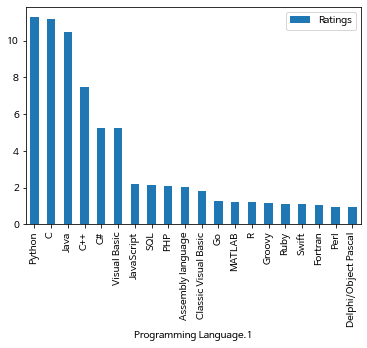

In [13]:
df = pd.read_html('https://www.tiobe.com/tiobe-index/')[0]

df['Ratings'] = df['Ratings'].str.rstrip('%').astype(float)

df[['Programming Language.1', 'Ratings']].plot.bar(x='Programming Language.1')